In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxw 
from numba import njit
import time

In [46]:
#1.2
def Bx(x, y, z, N): 
    u, w = np.polynomial.chebyshev.chebgauss(N)
    d1 = ((x - u)**2 + (y - np.sqrt(1 - u**2))**2 + z**2)**1.5
    d2 = ((x + u)**2 + (y + np.sqrt(1 - u**2))**2 + z**2)**1.5
    f = - z*u * ((1/d1 - 1/d2)) 
    return f * w
def By(x, y, z, N):
    u, w = np.polynomial.chebyshev.chebgauss(N)
    d1 = ((x - u)**2 + (y - np.sqrt(1 - u**2))**2 + z**2)**1.5
    d2 = ((x + u)**2 + (y + np.sqrt(1 - u**2))**2 + z**2)**1.5
    f = - z * np.sqrt(1-u**2) * ((1/d1 - 1/d2) * np.sqrt(1-u**2))
    return f * w
def Bz(x, y, z, N):
    u, w = np.polynomial.chebyshev.chebgauss(N)
    d1 = ((x - u)**2 + (y - np.sqrt(1 - u**2))**2 + z**2)**1.5
    d2 = ((x + u)**2 + (y + np.sqrt(1 - u**2))**2 + z**2)**1.5
    f =   - (((1 - x*u - y*np.sqrt(1-u**2))/d1) + ((1 + x*u + y*np.sqrt(1 - u**2))/d2)) 
    return f * w
print(np.sum(Bx(2, 2, 0, 100)))
print(np.sum(By(2, 2, 0, 100)))
print(np.sum(Bz(2, 2, 0, 100)))

0.0
0.0
0.16127809380538324


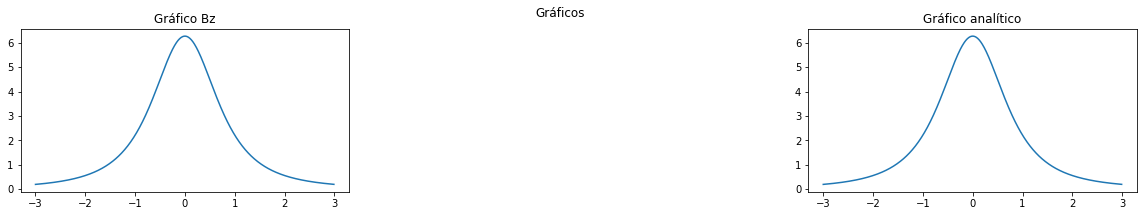

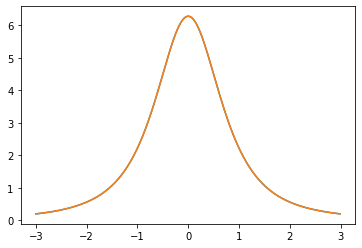

In [6]:
#1.3
def exato(I, R, z):
    uo = 4*np.pi
    return (uo*I*R**2) / (2*((z**2 + R**2)**1.5))

x = np.arange(-3, 3, 0.01)
l = []
for i in x:
    l.append(-np.sum(Bz(0, 0, i, 100)))
figura= plt.figure(figsize=(20,3))
figura.suptitle('Gráficos')              

figura.add_subplot(131)                      
plt.plot(x, l)
plt.title('Gráfico Bz')

figura.add_subplot(133)
plt.plot(x, [exato(1, 1, xi)for xi in x])
plt.title('Gráfico analítico')
plt.show()
plt.plot(x,l)
plt.plot(x,[exato(1,1,xi) for xi in x])
plt.show()

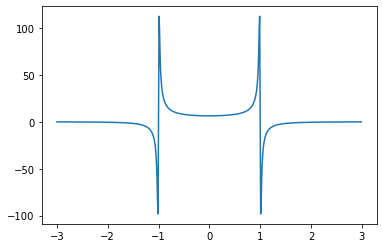

In [16]:
#1.4
l = []
for i in np.arange(-3, 3, 0.01):
    l.append(-np.sum(Bz(i, 0, 0, 100)))
plt.plot(np.arange(-3, 3, 0.01), l)
plt.show()

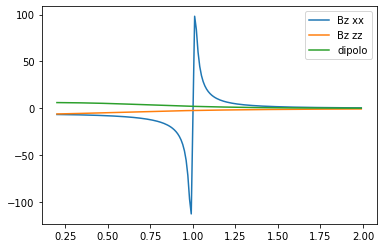

In [18]:
#1.5
def dipolo(p):
    return (2*np.pi) / (p**3 + 1)**1.5
x = np.arange(0.2, 2, 0.01)
valor = []
valor2 = []
for i in x:
    valor.append(np.sum(Bz(i, 0, 0, 100)))
    valor2.append(np.sum(Bz(0, 0, i, 100)))
plt.plot(x, valor, label = 'Bz xx')
plt.plot(x, valor2, label = 'Bz zz')
plt.plot(x, [dipolo(xi) for xi in x], label = 'dipolo')
plt.legend()
plt.show()

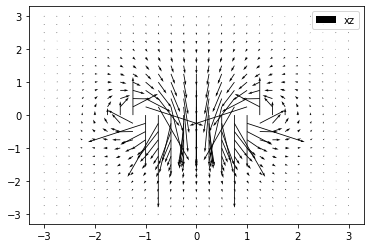

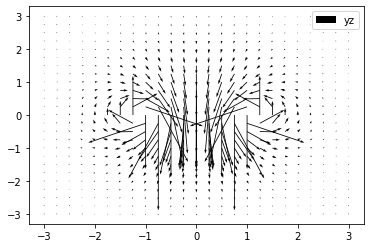

In [43]:
#1.6
x, z = np.arange(-3, 3.25, 0.25), np.arange(-3, 3.25, 0.25)
x1, x2 = np.zeros([len(x), len(z)]), np.zeros([len(x), len(z)])
for i,n in enumerate(x):
    for j,k in enumerate(z):
        x1[i,j], x2[i,j] = np.sum(Bz(k, 0, n, 100)), np.sum(Bx(k, 0, n, 100))
plt.quiver(x, z, x2, x1, label = 'xz')
plt.legend()
plt.show()

for i,n in enumerate(x):
    for j,k in enumerate(z):
        x1[i,j], x2[i,j] = np.sum(By(0, k, n, 100)), np.sum(Bz(0, k, n, 100))
plt.quiver(x, z, x1, x2, label = 'yz')
plt.legend()
plt.show()

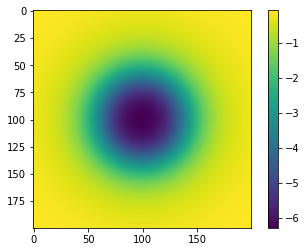

In [26]:
#1.7
def r(a, b):
    return(np.sqrt(a**2 + b**2))

p = 200
x = y = np.linspace(-1.5, 1.5, p)
X, Y = np.meshgrid(x, y)
I = np.zeros([p,p])
for i, n in enumerate(x):
    for j, k in enumerate(y):
        if abs(r(n, k)-1) > 0.5:
            I[i,j] = np.sum(Bz(n, k, r(n,k), 20))
        if 0.1 < abs(r(n, k)-1) < 0.5:
            I[i,j] = np.sum(Bz(n, k, r(n,k), 40))
        if 0.01 < abs(r(n,k)-1) < 0.1:
            I[i,j] = np.sum(Bz(n, k, r(n,k), 80))
        if abs(r(n,k)-1) < 0.01:
            I[i,j] = np.sum(Bz(n, k, r(n,k), 200))
plt.imshow(I)
plt.colorbar()
plt.show()

## 2

In [3]:
#2.1
u, w = np.polynomial.chebyshev.chebgauss(100)
@njit
def Bt(x, y, z1, z2):
    def Bx(x, y, z1, z2): 
        d1 = ((x - u)**2 + (y - np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        d2 = ((x + u)**2 + (y + np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        f = -(z1 - z2)*u * ((1/d1 - 1/d2)) 
        return np.sum(f * w)

    def By(x, y, z1, z2):
        d1 = ((x - u)**2 + (y - np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        d2 = ((x + u)**2 + (y + np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        f = -(z1 - z2) * np.sqrt(1-u**2) * ((1/d1 - 1/d2))
        return np.sum(f * w)

    def Bz(x, y, z1, z2):
        d1 = ((x - u)**2 + (y - np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        d2 = ((x + u)**2 + (y + np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        f = -(((1 - x*u - y*np.sqrt(1-u**2))/d1) + ((1 + x*u + y*np.sqrt(1 - u**2))/d2)) 
        return np.sum(f * w)
    return np.array([Bx(x, y, z1, z2), By(x, y, z1, z2), Bz(x, y, z1, z2)])
def simpson(x, y, z1, L, n):
    def Integrationx(x, y, z1, n):
        r = np.linspace(-L, L, n + 1)
        hr = r[0] - r[1]
        f1 = np.zeros(r.shape)
        for i,n in enumerate(r):
            f1[i]=Bt(x,y,z1,n)[0]
        return hr/3 *( f1[0] + f1[-1] + 4*np.sum(f1[1:-1:2]) + 2*np.sum(f1[2:-2:2]))
    def Integrationy(x, y, z1, n):
        r = np.linspace(-L, L, n + 1)
        hr = r[0] - r[1]
        f1 = np.zeros(r.shape)
        for i,n in enumerate(r):
            f1[i]=Bt(x,y,z1,n)[1]
        return hr/3 *( f1[0] + f1[-1] + 4*np.sum(f1[1:-1:2]) + 2*np.sum(f1[2:-2:2]))
    def Integrationz(x, y, z1, n):
        r = np.linspace(-L, L, n + 1)
        hr = r[0] - r[1]
        f1 = np.zeros(r.shape)
        for i,n in enumerate(r):
            f1[i]=Bt(x,y,z1,n)[2]
        return hr/3 *( f1[0] + f1[-1] + 4*np.sum(f1[1:-1:2]) + 2*np.sum(f1[2:-2:2]))
    return np.array([Integrationx(x, y, z1, n), Integrationy(x, y, z1, n), Integrationz(x, y, z1, n)])

print(simpson(0, 0, 4, 1, 100))
# Tempo aproximado 0.07505

[-0.         -0.          0.20041713]


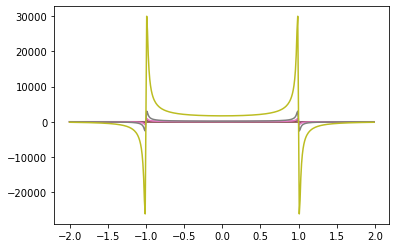

2.2240519523620605


In [6]:
#2.2
s = time.time()
xr = np.arange(-2, 2, 0.01)
valor = np.zeros(xr.shape)
valor2 = np.zeros(xr.shape)
valor3 = np.zeros(xr.shape)
valor4 = np.zeros(xr.shape)
valor5 = np.zeros(xr.shape)
valor6 = np.zeros(xr.shape)
valor7 = np.zeros(xr.shape)
valor8 = np.zeros(xr.shape)
valor9 = np.zeros(xr.shape)
for i,n in enumerate(xr):
    valor[i] = simpson(n, 0, 0, 0.01, 10)[2]
    valor2[i] = simpson(n, 0, 0, 0.1, 10)[2]
    valor3[i] = simpson(n, 0, 0, 0.3, 10)[2]
    valor4[i] = simpson(n, 0, 0, 1, 10)[2]
    valor5[i] = simpson(n, 0, 0, 3, 10)[2]
    valor6[i] = simpson(n, 0, 0, 10, 10)[2]
    valor7[i] = simpson(n, 0, 0, 30, 10)[2]
    valor8[i] = simpson(n, 0, 0, 100, 10)[2]
    valor9[i] = simpson(n, 0, 0, 1000, 10)[2]
    
plt.plot(xr, valor)
plt.plot(xr, valor2)
plt.plot(xr, valor3)
plt.plot(xr, valor4)
plt.plot(xr, valor5)
plt.plot(xr, valor6)
plt.plot(xr, valor7)
plt.plot(xr, valor8)
plt.plot(xr, valor9)
plt.show()
e = time.time()
print(e-s)
# Tempo aproximado 27.23s

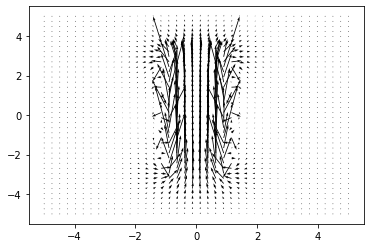

In [10]:
#2.3
def Campo(L):
    x, z = np.linspace(-5, 5, 40), np.linspace(-5, 5, 40)
    x1, x2 = np.zeros([len(x), len(z)]), np.zeros([len(x), len(z)])
    for i,n in enumerate(x):
        for j,k in enumerate(z):
                x1[i,j], x2[i,j] = np.sum(simpson(k, 0, n, L, 10)[2]), np.sum(simpson(k, 0, n, L, 10)[0])
    plt.quiver(x, z, x2, x1)
    plt.show()
Campo(3)

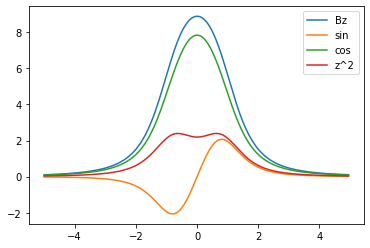

In [16]:
#2.4
def Btk(x, y, z1, z2, N):
    def Bzk(x, y, z1, z2, N):
        u, w = np.polynomial.chebyshev.chebgauss(N)
        d1 = ((x - u)**2 + (y - np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        d2 = ((x + u)**2 + (y + np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        f = Kz(z2) *  -(((1 - x*u - y*np.sqrt(1-u**2))/d1) + ((1 + x*u + y*np.sqrt(1 - u**2))/d2)) 
        return np.sum(f * w)
    return np.array([Bzk(x, y, z1, z2, N)])
def simpsonK(x, y, z1, L, n, N):
    def Integrationzk(x, y, z1, n, N):
        r = np.linspace(-L, L, n + 1)
        hr = r[0] - r[1]
        func = np.vectorize(lambda z2 : Btk(x, y, z1, z2, N))
        f1 = func(r)
        return hr/3 *( f1[0] + f1[-1] + 4*np.sum(f1[1:-1:2]) + 2*np.sum(f1[2:-2:2]))
    return np.array([Integrationzk(x, y, z1, n, N)])
x = np.arange(-5, 5, 0.05)
def Kz(z2):
    return 1
plt.plot(x, [simpsonK(0, 0, xi, 1, 100, 100) for xi in x], label = 'Bz')
def Kz(z2):
    return np.sin(z2)
plt.plot(x, [simpsonK(0, 0, xi, 1, 100, 100) for xi in x], label = 'sin')
def Kz(z2):
    return np.cos(z2)
plt.plot(x, [simpsonK(0, 0, xi, 1, 100, 100) for xi in x], label = 'cos')
def Kz(z2):
    return z2**2
plt.plot(x, [simpsonK(0, 0, xi, 1, 100, 100) for xi in x], label = 'z^2')
plt.legend()
plt.show()

## 3

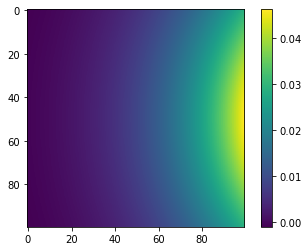

17.648735761642456


In [18]:
#3.1
s = time.time()
def Bt_3(x, y, z1, z2, N):
    def Bz_3(x, y, z1, z2, N):
        u, w = np.polynomial.chebyshev.chebgauss(N)
        d1 = ((x - u)**2 + (y - np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        d2 = ((x + u)**2 + (y + np.sqrt(1 - u**2))**2 + (z1 - z2)**2)**1.5
        f = -(((1 - x*u - y*np.sqrt(1-u**2))/d1) + ((1 + x*u + y*np.sqrt(1 - u**2))/d2)) 
        return f * w 
    return np.array([np.sum(Bz_3(x, y, z1, z2, N))])
def simpson_3(x, y, z1, L, n, N):
    def Integrationz_3(x, y, z1, n, N):
        r = np.linspace(-L, L, n + 1)
        hr = r[0] - r[1]
        func = np.vectorize(lambda z2 : Bt_3(x, y, z1, z2, N))
        f1 = func(r)
        return hr/3 *( f1[0] + f1[-1] + 4*np.sum(f1[1:-1:2]) + 2*np.sum(f1[2:-2:2]))
    return np.array([Integrationz_3(x, y, z1, n, N)])
x, y = np.linspace(-2.5, 2.5, 100), np.linspace(-2.5, 2.5, 100)
m = np.zeros([100, 100])
X, Y = np.meshgrid(x, y)
for i,n in enumerate(x):
    for j,k in enumerate(y):
        m[i, j] = (simpson_3(n, k-6, 6, 2, 10, 100))
plt.imshow(m)
plt.colorbar()
plt.show()
e = time.time()
print(e-s)

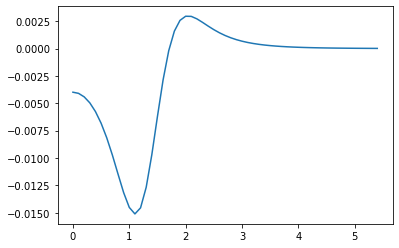

In [36]:
#3.2
def fluxo_t(N, t):
    u, w = np.polynomial.legendre.leggauss(N)
    I = 0
    for j, k in enumerate(u):
        for i, p in enumerate(u):
            f = simpson_3(2*p, 2*(k-6), (6-(t**2*9.80665)/2), 1, 10, 80)
            I += f*w[i]*w[j]
    return(I)
x = np.arange(0, np.sqrt(30), 0.1)
plt.plot(x, [fluxo_t(10, xi) for xi in x])
plt.show()

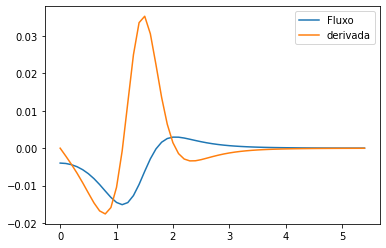

In [37]:
#3.3
def dfluxo(N, t, dt):
    df =((fluxo_t(N, t+dt) - fluxo_t(N, t)) / dt)
    return df
x = np.arange(0, np.sqrt(30), 0.1)
plt.plot(x, [fluxo_t(10, xi)for xi in x], label = 'Fluxo')
plt.plot(x, [dfluxo(10, xi, 1e-8) for xi in x], label = 'derivada')
plt.legend()
plt.show()
# Tempo aproximado 19.7s

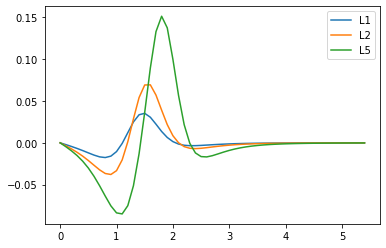

63.72952890396118


In [19]:
#3.4
s = time.time()
def fluxo_tL(N, t, L):
    u1, w1 = np.polynomial.legendre.leggauss(N)
    I = 0
    for j, k in enumerate(u1):
        for i, p in enumerate(u1):
            f = simpson_3(2*p, 2*(k-6), (5+L-(t**2*9.80665)/2), L, 10, 80)
            I += f*w1[i]*w1[j]
    return(I)
def dfluxoL(N, t, dt, L):
    df =((fluxo_tL(N, t+dt, L) - fluxo_tL(N, t, L)) / dt)
    return df
x = np.arange(0, np.sqrt(30), 0.1)
plt.plot(x, [dfluxoL(10, xi, 1e-8, 1) for xi in x], label = 'L1')
plt.plot(x, [dfluxoL(10, xi, 1e-8, 2) for xi in x], label = 'L2')
plt.plot(x, [dfluxoL(10, xi, 1e-8, 5) for xi in x], label = 'L5')
plt.legend()
plt.show()
e = time.time()
print(e-s)